In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
from itertools import product
import xgboost as xgb
#from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import combinations
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

# Submission

1.  local: 0.6394443 - public: 0.642259 --только на статусах из pmstring
2.  local: 0.669483  - public: 0.678312  добавил агрегаты по суммам
3.  local: 0.6706974 - public: 0.682243 - изменил признаки из pmstring (суммирую с 0го периода, а не скользящими)
4.  local: 0.6740674 - public: 0.682199 добавил признаки "количество запросов в бюро, количество просрочек
5.  local: 0.6794322 - public: 0.684776 добавил признаки со временем
6.  local: 0.6810232 - public: 0.690776 исправил баг
7.  local: 0.6914358 - public: 0.704496 добавил кросс переменных
8.  local: 0.6949604 - public: 0.708006 еще немного кросс переменных
9.  local: 0.6973324 - public: добавил двойную кросс переменную
11. еще одна двойная кросс + перебил код на Pycharm
12. local: 0.7037935 - public: 0.711712 добавил mean target
16. local: 0.7029204   public: 0.710702 изменил гиперпараметры

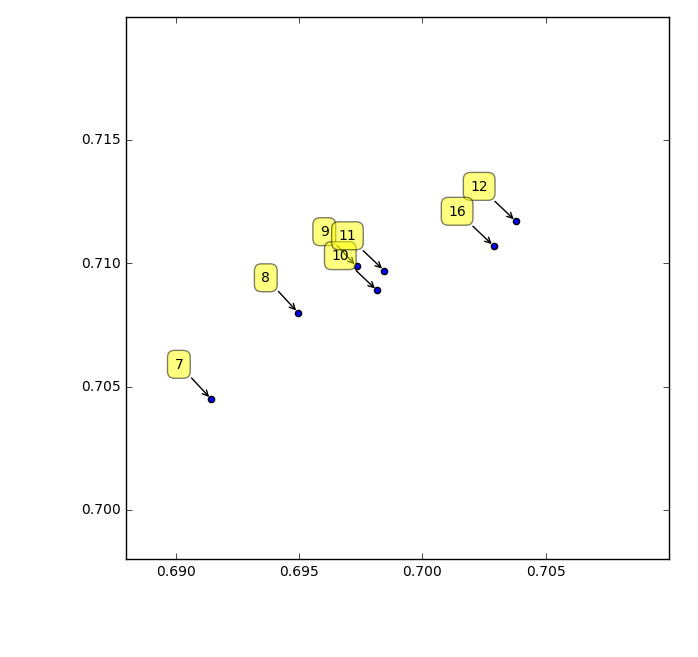

In [4]:
data = {1:[0.6394443,0.642259],
        2:[0.669483,0.6783128456394],
        3:[0.6706974,0.682243],
        4:[0.6740674,0.682199],
        5:[0.6794322,0.6847760771968],
        6:[0.6810232,0.69077653969932],
        7:[0.6914358, 0.704496],
        8:[0.6949604, 0.708006],
        9:[0.6973324, 0.709875],
        10:[0.6981626, 0.708903],
        11:[0.698451, 0.70970951947968],
        12:[0.7037935, 0.711712],
        16: [0.7029,0.710702] 
       }
data = pd.DataFrame(data).T
#data.columns = ['local','public']

labels = data.index

plt.figure(figsize=(7, 7))
plt.scatter(data.loc[:, 0], data.loc[:, 1],
            cmap=plt.get_cmap('Spectral'))
plt.xlim(0.688,  0.71)
plt.ylim(0.698,  0.72)
    
for label, x, y in zip(labels, data.loc[:, 0], data.loc[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [5]:
data.columns = ['local','public']

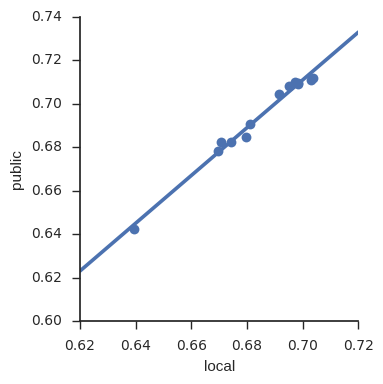

In [6]:
import seaborn as sns
sns.set(style="ticks")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="local", y="public", data=data,
                # truncate=True,
                # col_wrap=2, 
                ci=None, 
                palette="muted",
                scatter_kws={"s": 50, "alpha": 1},
                size=4)
# Use more informative axis labels than are provided by default
g.set_axis_labels("local", "public")